In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression

In [2]:
data_cols = ['Bike Count','Temperature', 'Humidity', 'Windspeed', 'Visibility', 'Dewpoint', 'Solar radiation', 'Snowfall', 'Rainfall',' Functioning Day']


In [3]:
df = pd.read_csv('SeoulBikeData.csv').drop(['Date', 'Holiday', 'Seasons'], axis= 1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df = df[df['Hour']== 12]
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
12,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Yes
36,479,12,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,Yes
60,333,12,5.8,85,1.7,349,3.4,0.43,0.0,0.0,Yes
84,393,12,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,Yes
108,321,12,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,Yes


In [5]:
df = df.drop('Hour', axis= 1)
df.head()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Yes
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,Yes
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,Yes
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,Yes
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,Yes


In [6]:
df['Functioning Day'] = (df['Functioning Day'] == 'Yes').astype(int)
df.head()

,Rented Bike Count,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


In [7]:
df.columns = data_cols
df.head()

,Bike Count,Temperature,Humidity,Windspeed,Visibility,Dewpoint,Solar radiation,Snowfall,Rainfall,Functioning Day
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


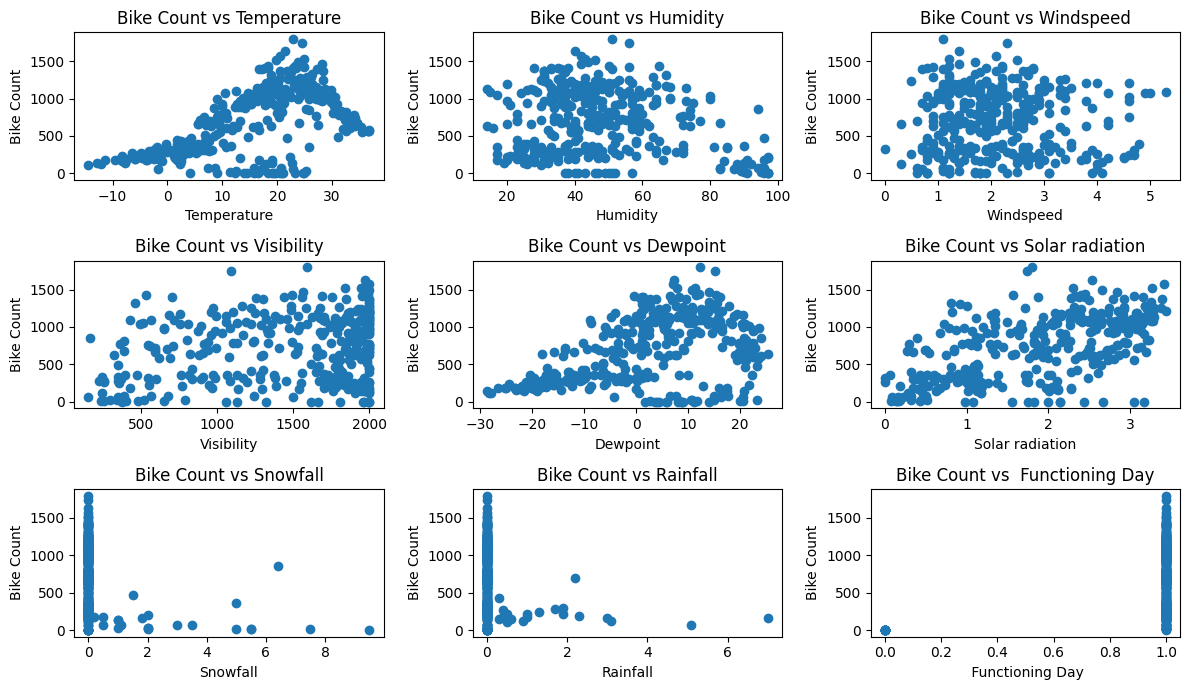

In [8]:
fig, axes = plt.subplots(3, 3, figsize= (12, 7))
axes= axes.flatten()
for ax, col in zip(axes, df.columns[1:]):
  ax.scatter(  df[col], df['Bike Count'])
  ax.set_title(f'Bike Count vs {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('Bike Count')
plt.tight_layout()
plt.show()


In [9]:
df.columns

Index(['Bike Count', 'Temperature', 'Humidity', 'Windspeed', 'Visibility',
       'Dewpoint', 'Solar radiation', 'Snowfall', 'Rainfall',
       ' Functioning Day'],
      dtype='object')

In [10]:
df = df.drop(['Visibility', 'Windspeed', ' Functioning Day'], axis= 1)
df

,Bike Count,Temperature,Humidity,Dewpoint,Solar radiation,Snowfall,Rainfall
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0
...,...,...,...,...,...,...,...
8652,752,9.1,57,1.0,1.69,0.0,0.0
8676,672,9.3,61,2.1,0.85,0.0,0.0
8700,635,7.9,14,-18.0,1.81,0.0,0.0
8724,661,5.6,27,-11.9,0.34,0.0,0.0


In [11]:
len(df)

365

In [12]:
train, valid, test = np.split(df.sample(frac= 1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
def get_xy(dataframe, y_label, x_label= None):
  dataframe = dataframe.copy()

  if x_label is None:
    X = [[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_label) == 1:
      X = dataframe[x_label[0]].values.reshape(-1,1)
    else:
      X = dataframe[x_label].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((X, y))

  return data, X, y


In [14]:
_, X_train_temp, y_train_temp = get_xy(train, y_label= 'Bike Count', x_label= ['Temperature'])
_, X_valid_temp, y_valid_temp = get_xy(valid, y_label= 'Bike Count', x_label= ['Temperature'])
_, X_test_temp, y_test_temp = get_xy(test, y_label= 'Bike Count', x_label= ['Temperature'])



In [15]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [16]:
print(temp_reg.score(X_test_temp, y_test_temp))

0.400010354120898


In [17]:
print(temp_reg.coef_, temp_reg.intercept_)

[[19.79191098]] [374.03313059]


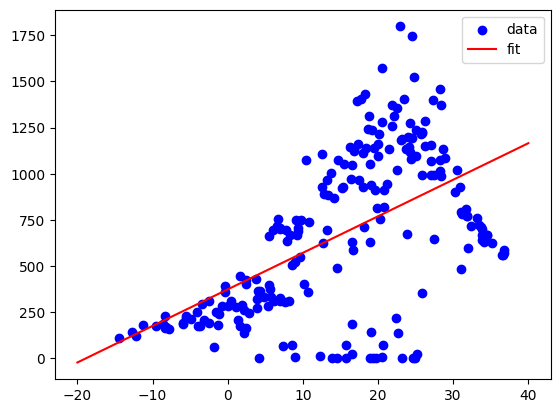

In [18]:
plt.scatter(X_train_temp, y_train_temp,label= 'data' ,color= 'blue', )
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), color= 'red', label= 'fit')
plt.legend()

In [19]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8* len(df))])
_, X_train_all, y_train_all = get_xy(train, y_label= 'Bike Count', x_label= df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, y_label= 'Bike Count', x_label= df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, y_label= 'Bike Count', x_label= df.columns[1:])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
print(len(X_train_all))
print(len(y_train_all))
print(len(X_valid_all))
print(len(y_valid_all))

219
219
73
73


In [21]:
X_train_all

array([[ 18.7 ,  39.  ,   4.4 ,   3.21,   0.  ,   0.  ],
       [ -8.6 ,  40.  , -19.8 ,   1.11,   0.  ,   0.  ],
       [ -0.3 ,  38.  , -12.9 ,   1.11,   0.  ,   0.  ],
       ...,
       [ 25.2 ,  89.  ,  23.2 ,   0.32,   2.  ,   0.  ],
       [ 18.4 ,  28.  ,  -0.4 ,   2.33,   0.  ,   0.  ],
       [  5.6 ,  72.  ,   0.9 ,   0.89,   0.  ,   0.  ]])

In [22]:
lr_all = LinearRegression()
lr_all.fit(X_train_all, y_train_all)

LinearRegression()

In [23]:
print(lr_all.score(X_test_all, y_test_all))

0.4869469269911839


In [24]:
temp_normalized = tf.keras.layers.Normalization(input_shape= (1, ), axis= None)
temp_normalized.adapt(X_train_temp.reshape(-1))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
temp_nn_model = tf.keras.Sequential(
   [temp_normalized,
    tf.keras.layers.Dense(1)
    ]
)



In [26]:
temp_nn_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.1),
    loss= 'mean_squared_error',
    metrics= ['Accuracy']
)

In [27]:
history = temp_nn_model.fit(X_train_temp, y_train_temp,
                            epochs=1000, validation_data= (X_valid_temp, y_valid_temp),
                            verbose= 0)

In [28]:
def plot_history(history):
  plt.plot(history.history['loss'], label = 'Loss')
  plt.plot(history.history['val_loss'], label= 'val_loss')
  plt.xlabel('Epochs')
  plt.ylabel('Mean squared error')
  plt.grid(True, alpha= .6)
  plt.legend()
  plt.show()

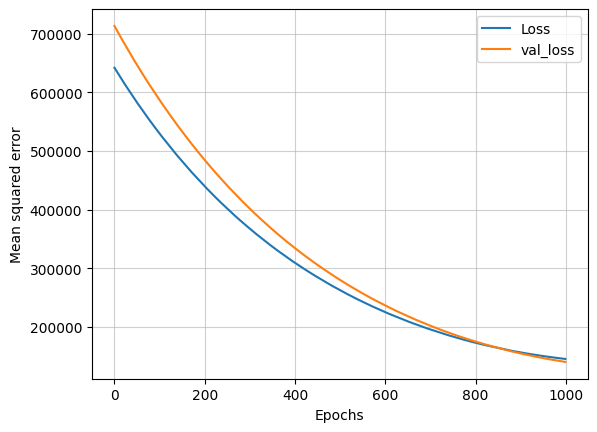

In [29]:
plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


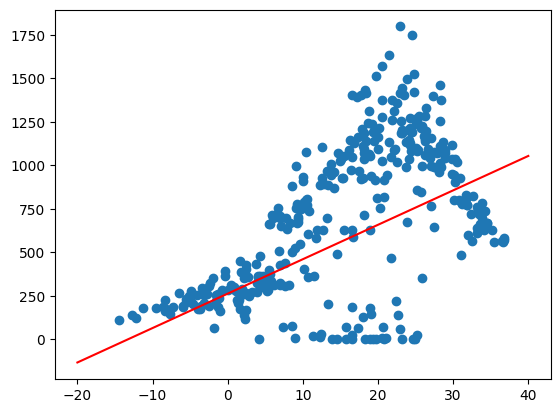

In [30]:
plt.scatter(df['Temperature'], df['Bike Count'], label= 'data')
x= tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1)), color='Red', label= 'Fit')

In [31]:
all_normalized = tf.keras.layers.Normalization(input_shape = (6, ), axis= None)
all_normalized.adapt(X_train_all.reshape(-1,1))


In [32]:
X_train_all.reshape(-1,1)

array([[18.7 ],
       [39.  ],
       [ 4.4 ],
       ...,
       [ 0.89],
       [ 0.  ],
       [ 0.  ]])

In [33]:
nn_all_model = tf.keras.Sequential([
    all_normalized,
    tf.keras.layers.Dense(1)
])

In [34]:
nn_all_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.1),
    loss= 'mean_squared_error'

)

In [35]:
history_all = nn_all_model.fit(X_train_all, y_train_all,
                               epochs= 1000, verbose= 0, validation_data=(X_valid_all, y_valid_all)
                                )

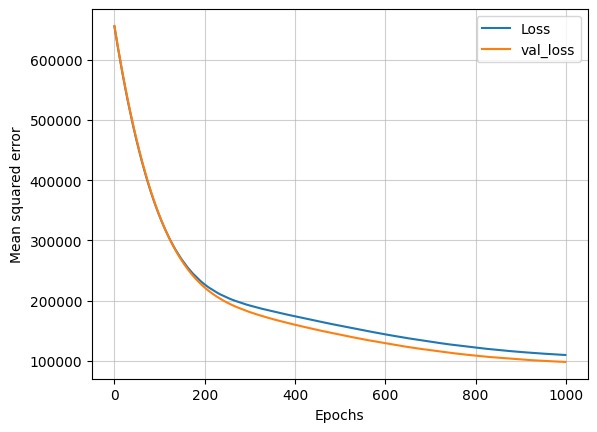

In [36]:
plot_history(history_all)

NEURAL NET

In [37]:
nn_model = tf.keras.Sequential([
    all_normalized,
    tf.keras.layers.Dense(32, activation='relu', input_shape=(6, )),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
nn_model.compile(
    tf.keras.optimizers.Adam(learning_rate= 0.001),
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

In [59]:
history = nn_model.fit(X_train_all, y_train_all,
    epochs= 100,
    verbose= 0,
    validation_data= (X_valid_all, y_valid_all)

)

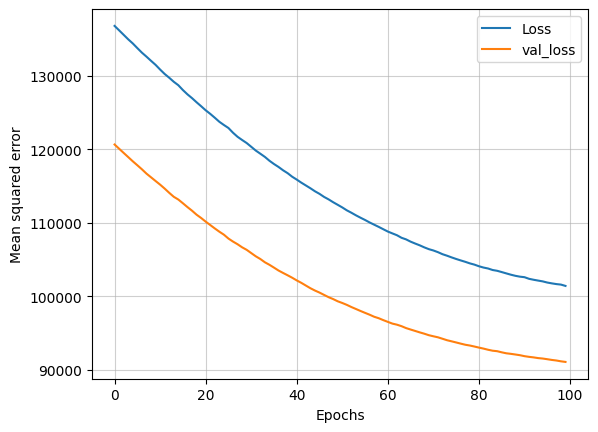

In [60]:
plot_history(history)

In [41]:
nn_temp = tf.keras.Sequential(
    [temp_normalized,
     tf.keras.layers.Dense(32, activation= 'relu', input_shape= (1,)),
     tf.keras.layers.Dense(32, activation= 'relu'),
     tf.keras.layers.Dense(1),
         ]
)
nn_temp.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
    loss= 'mean_squared_error',

)

In [42]:
history = nn_temp.fit(
    X_train_temp, y_train_temp,
    epochs = 100,
    verbose= 0,
    validation_data= (X_valid_temp, y_valid_temp)
)

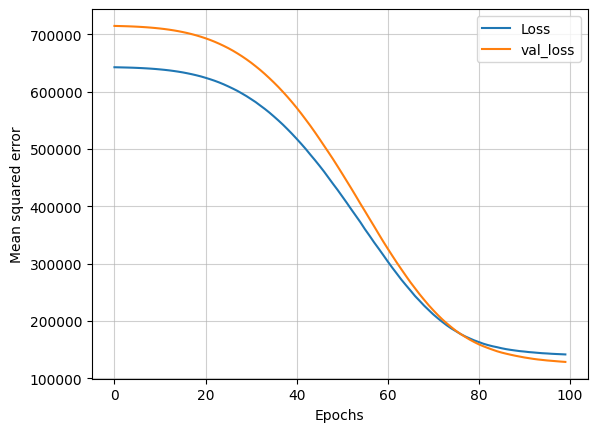

In [43]:
plot_history(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


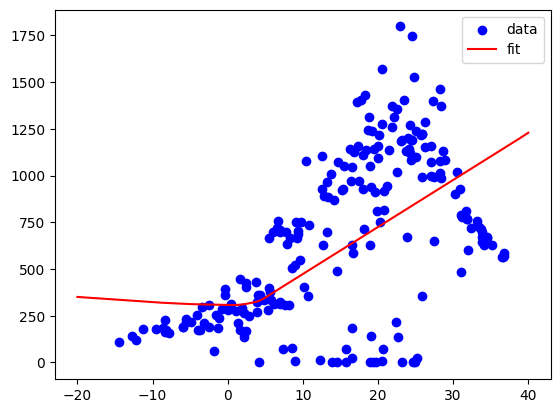

In [44]:
plt.scatter(X_train_temp, y_train_temp,label= 'data' ,color= 'blue', )
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_temp.predict(np.array(x).reshape(-1,1)), color= 'red', label= 'fit')
plt.legend()

In [45]:
y_pred_lr = lr_all.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [46]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [47]:
MSE(y_pred_lr, y_test_all)

np.float64(102726.48256938797)

In [48]:
MSE(y_pred_nn, y_test_all)

np.float64(143204.85020248944)

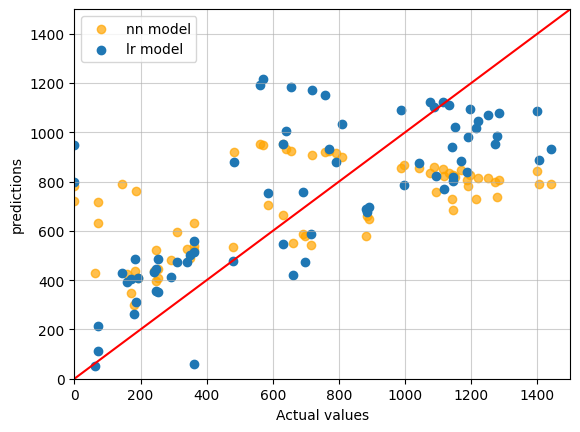

In [61]:
plt.scatter(y_test_all, y_pred_nn, label= 'nn model', color= 'orange', alpha= 0.7)
plt.scatter(y_test_all, y_pred_lr, label = 'lr model')
plt.xlabel("Actual values")
plt.ylabel('predictions')
plt.legend()
plt.grid(True, alpha= 0.6)
lims =[0, 1500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, color= 'red')